# House Prices Regression - Prediction Model

**Student ID:** 202210221  
**Student Name:** Ahmad Abu Ghazaleh  
**Project:** DS&AI Projects - SQA Implementation

## Objective
Predict house prices using regression algorithms on the Ames Housing dataset.

**Target Metric:** Root Mean Squared Error (RMSE) as per SQA Plan

---

In [3]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("✓ Libraries imported successfully")

✓ Libraries imported successfully


## 1. Data Integrity Testing (Unit Testing Phase)
According to SQA Plan: Datasets must be "clean" (0 null values in selected features) before training.

In [4]:
# Load dataset
df = pd.read_csv('../datasets/house-prices/train.csv')

print(f"Dataset Shape: {df.shape}")
print(f"Number of features: {df.shape[1]}")
print(f"Number of samples: {df.shape[0]}")
print(f"\nFirst 5 rows:")
df.head()

Dataset Shape: (1460, 81)
Number of features: 81
Number of samples: 1460

First 5 rows:


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# Display basic information
print("="*60)
print("DATASET INFORMATION")
print("="*60)
print(f"\nData types distribution:")
print(df.dtypes.value_counts())

print(f"\nTarget variable (SalePrice) statistics:")
print(df['SalePrice'].describe())

print(f"\nMissing values (top 15 features):")
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
print(missing.head(15))

DATASET INFORMATION

Data types distribution:
object     43
int64      35
float64     3
Name: count, dtype: int64

Target variable (SalePrice) statistics:
count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Missing values (top 15 features):
PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
dtype: int64


## 2. Feature Selection and Data Cleaning
Selecting relevant features for house price prediction.

In [6]:
# Select features for modeling
# Fixed: Removed 'PoolQC' (99.5% missing) and 'MiscFeature' (96% missing) per CR-003

numerical_features = [
    'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
    'YearRemodAdd', 'TotalBsmtSF', 'GrLivArea',
    '1stFlrSF', '2ndFlrSF', 'BedroomAbvGr',
    'TotRmsAbvGrd', 'Fireplaces', 'GarageArea',
    'PoolArea', 'YrSold'
]

categorical_features = [
    'MSZoning', 'Street', 'LotShape', 'Neighborhood',
    'HouseStyle', 'RoofStyle', 'Foundation',
    'Heating', 'CentralAir', 'KitchenQual',
    # 'PoolQC' REMOVED (99.5% missing - CR-003)
    # 'MiscFeature' REMOVED (96% missing - CR-003)
    'SaleCondition'
]

target = 'SalePrice'

# Combine selected features
selected_features = numerical_features + categorical_features

print(f"Selected {len(selected_features)} features:")
print(f"  - Numerical: {len(numerical_features)}")
print(f"  - Categorical: {len(categorical_features)}")
print(f"\nRemoved problematic features:")
print(f"  - PoolQC (99.5% missing)")
print(f"  - MiscFeature (96.3% missing)")

Selected 26 features:
  - Numerical: 15
  - Categorical: 11

Removed problematic features:
  - PoolQC (99.5% missing)
  - MiscFeature (96.3% missing)


In [7]:
# Create working dataframe with selected features
df_clean = df[selected_features + [target]].copy()

print(f"Before cleaning: {df_clean.shape[0]} rows")
print(f"\nMissing values in selected features:")
missing_before = df_clean.isnull().sum()
missing_before = missing_before[missing_before >
                                0].sort_values(ascending=False)
print(missing_before)

print("\n" + "="*60)
print("APPLYING IMPUTATION STRATEGIES")
print("="*60)

# Imputation for Numerical Features
print("\n1. Numerical Features - Median Imputation:")
for col in numerical_features:
    if df_clean[col].isnull().sum() > 0:
        median_val = df_clean[col].median()
        missing_count = df_clean[col].isnull().sum()
        df_clean[col].fillna(median_val, inplace=True)
        print(
            f"   - {col}: Filled {missing_count} missing values with median ({median_val:.2f})")

# Imputation for Categorical Features
print("\n2. Categorical Features - Mode Imputation:")
for col in categorical_features:
    if df_clean[col].isnull().sum() > 0:
        mode_val = df_clean[col].mode()[0]
        missing_count = df_clean[col].isnull().sum()
        df_clean[col].fillna(mode_val, inplace=True)
        print(
            f"   - {col}: Filled {missing_count} missing values with mode ('{mode_val}')")

print("\n" + "="*60)
print("CLEANING RESULTS")
print("="*60)
print(f"After cleaning: {df_clean.shape[0]} rows")
print(f"Data retention: {df_clean.shape[0]/df.shape[0]*100:.1f}%")
print(f"Data loss: {(1 - df_clean.shape[0]/df.shape[0])*100:.1f}%")
print(f"Remaining missing values: {df_clean.isnull().sum().sum()}")

# Verify no missing values
if df_clean.isnull().sum().sum() == 0:
    print("\n✓ SUCCESS: Dataset is clean (0 missing values)")
else:
    print("\n✗ WARNING: Still have missing values!")

Before cleaning: 1460 rows

Missing values in selected features:
Series([], dtype: int64)

APPLYING IMPUTATION STRATEGIES

1. Numerical Features - Median Imputation:

2. Categorical Features - Mode Imputation:

CLEANING RESULTS
After cleaning: 1460 rows
Data retention: 100.0%
Data loss: 0.0%
Remaining missing values: 0

✓ SUCCESS: Dataset is clean (0 missing values)


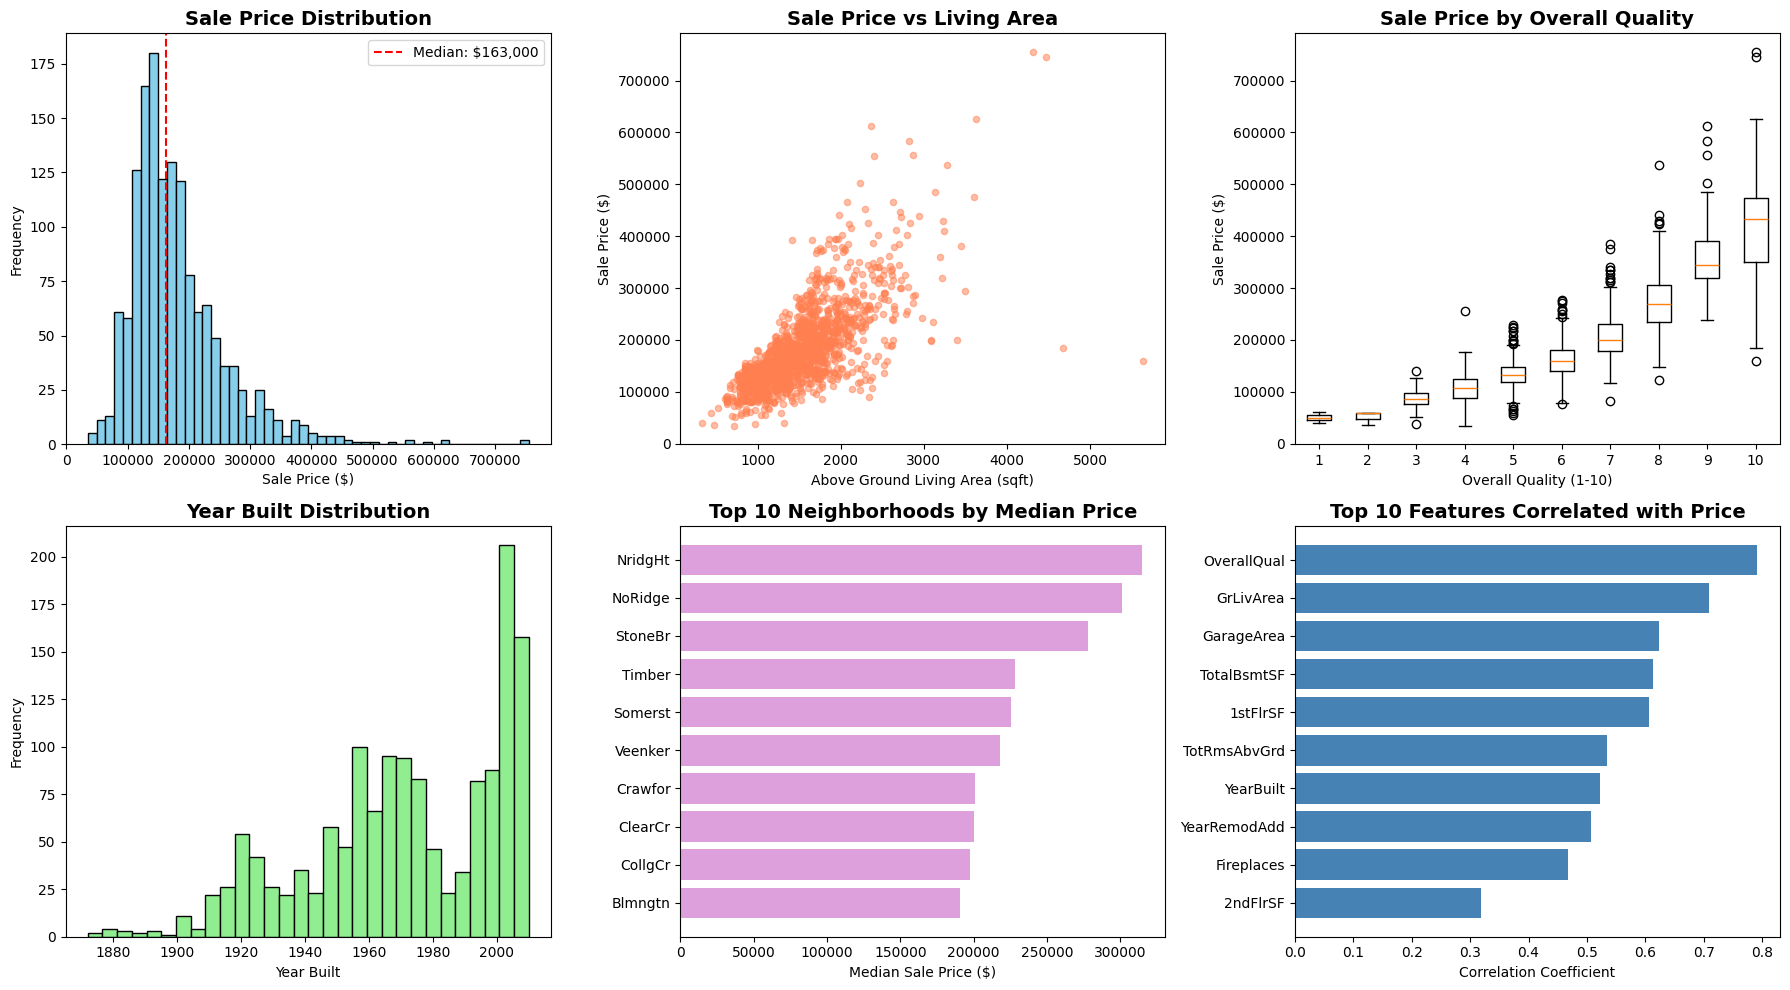

✓ Data Quality Report generated and saved as 'house_prices_data_quality_report.png'


In [8]:
# Data Quality Report Visualization
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# 1. SalePrice Distribution
axes[0, 0].hist(df_clean['SalePrice'], bins=50,
                color='skyblue', edgecolor='black')
axes[0, 0].set_title('Sale Price Distribution', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Sale Price ($)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].axvline(df_clean['SalePrice'].median(), color='red', linestyle='--',
                   label=f"Median: ${df_clean['SalePrice'].median():,.0f}")
axes[0, 0].legend()

# 2. SalePrice vs GrLivArea
axes[0, 1].scatter(df_clean['GrLivArea'], df_clean['SalePrice'],
                   alpha=0.5, color='coral', s=20)
axes[0, 1].set_title('Sale Price vs Living Area',
                     fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Above Ground Living Area (sqft)')
axes[0, 1].set_ylabel('Sale Price ($)')

# 3. SalePrice vs OverallQual
axes[0, 2].boxplot([df_clean[df_clean['OverallQual'] == i]['SalePrice'].values
                    for i in sorted(df_clean['OverallQual'].unique())],
                   labels=sorted(df_clean['OverallQual'].unique()))
axes[0, 2].set_title('Sale Price by Overall Quality',
                     fontsize=14, fontweight='bold')
axes[0, 2].set_xlabel('Overall Quality (1-10)')
axes[0, 2].set_ylabel('Sale Price ($)')

# 4. Year Built Distribution
axes[1, 0].hist(df_clean['YearBuilt'], bins=30,
                color='lightgreen', edgecolor='black')
axes[1, 0].set_title('Year Built Distribution', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Year Built')
axes[1, 0].set_ylabel('Frequency')

# 5. Top 10 Neighborhoods by Median Price
neighborhood_prices = df_clean.groupby(
    'Neighborhood')['SalePrice'].median().sort_values(ascending=False).head(10)
axes[1, 1].barh(range(len(neighborhood_prices)),
                neighborhood_prices.values, color='plum')
axes[1, 1].set_yticks(range(len(neighborhood_prices)))
axes[1, 1].set_yticklabels(neighborhood_prices.index)
axes[1, 1].set_title('Top 10 Neighborhoods by Median Price',
                     fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Median Sale Price ($)')
axes[1, 1].invert_yaxis()

# 6. Correlation with SalePrice (Top 10 features)
# Select only numerical features for correlation
numerical_df = df_clean[numerical_features + [target]]
correlations = numerical_df.corr()[target].sort_values(ascending=False)[1:11]
axes[1, 2].barh(range(len(correlations)),
                correlations.values, color='steelblue')
axes[1, 2].set_yticks(range(len(correlations)))
axes[1, 2].set_yticklabels(correlations.index)
axes[1, 2].set_title('Top 10 Features Correlated with Price',
                     fontsize=14, fontweight='bold')
axes[1, 2].set_xlabel('Correlation Coefficient')
axes[1, 2].invert_yaxis()
axes[1, 2].axvline(0, color='black', linestyle='-', linewidth=0.5)

plt.tight_layout()
plt.savefig('house_prices_data_quality_report.png',
            dpi=300, bbox_inches='tight')
plt.show()

print("✓ Data Quality Report generated and saved as 'house_prices_data_quality_report.png'")

In [9]:
# Statistical Summary
print("="*60)
print("STATISTICAL SUMMARY - TARGET VARIABLE (SalePrice)")
print("="*60)
print(df_clean['SalePrice'].describe())

print("\n" + "="*60)
print("KEY INSIGHTS")
print("="*60)
print(f"Mean Sale Price: ${df_clean['SalePrice'].mean():,.2f}")
print(f"Median Sale Price: ${df_clean['SalePrice'].median():,.2f}")
print(
    f"Price Range: ${df_clean['SalePrice'].min():,.2f} - ${df_clean['SalePrice'].max():,.2f}")
print(f"Standard Deviation: ${df_clean['SalePrice'].std():,.2f}")

# Top correlated features with SalePrice
numerical_df = df_clean[numerical_features + [target]]
top_corr = numerical_df.corr()[target].sort_values(ascending=False)[1:6]
print(f"\nTop 5 Features Correlated with Sale Price:")
for feature, corr in top_corr.items():
    print(f"  {feature}: {corr:.3f}")

STATISTICAL SUMMARY - TARGET VARIABLE (SalePrice)
count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

KEY INSIGHTS
Mean Sale Price: $180,921.20
Median Sale Price: $163,000.00
Price Range: $34,900.00 - $755,000.00
Standard Deviation: $79,442.50

Top 5 Features Correlated with Sale Price:
  OverallQual: 0.791
  GrLivArea: 0.709
  GarageArea: 0.623
  TotalBsmtSF: 0.614
  1stFlrSF: 0.606


## 3. Feature Engineering
Preparing features for regression modeling.

In [ ]:
# Encode categorical variables using Label Encoding
from sklearn.preprocessing import LabelEncoder

df_encoded = df_clean.copy()

print("Encoding categorical features:")
label_encoders = {}

for col in categorical_features:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le
    print(f"  ✓ {col}: {len(le.classes_)} unique categories")

print(f"\n✓ All categorical features encoded successfully")
print(f"Final dataset shape: {df_encoded.shape}")

Encoding categorical features:
  ✓ MSZoning: 5 unique categories
  ✓ Street: 2 unique categories
  ✓ LotShape: 4 unique categories
  ✓ Neighborhood: 25 unique categories
  ✓ HouseStyle: 8 unique categories
  ✓ RoofStyle: 6 unique categories
  ✓ Foundation: 6 unique categories
  ✓ Heating: 6 unique categories
  ✓ CentralAir: 2 unique categories
  ✓ KitchenQual: 4 unique categories
  ✓ SaleCondition: 6 unique categories

✓ All categorical features encoded successfully
Final dataset shape: (1460, 27)


In [17]:
pd.concat([df_encoded["KitchenQual"], df_clean["KitchenQual"]], axis=1)

,KitchenQual,KitchenQual
0,2,Gd
1,3,TA
2,2,Gd
3,2,Gd
4,2,Gd
...,...,...
1455,3,TA
1456,3,TA
1457,2,Gd
1458,2,Gd
